In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pymatgen.core.structure import Structure, Lattice
from pymatgen.analysis.graphs import StructureGraph
from pymatgen.analysis.local_env import CutOffDictNN
from torch_geometric.data import Data
import numpy as np
from omegaconf import OmegaConf
from mofgraph2vec.featurize.mof2doc import MOF2doc
import pandas as pd

/Users/xiaoqi/opt/anaconda3/envs/mofgraph2vec/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_vector = pd.read_csv("../data/embedding_example/embedding-h50rl5oi.csv").set_index("type")

In [4]:
config = OmegaConf.load("../conf/config.yaml")
config.mof2vec_data = OmegaConf.load("../conf/mof2vec_data/data.yaml")
config.mof2vec_model = OmegaConf.load("../conf/mof2vec_model/gensim.yaml")

In [5]:
config.mof2vec_data.data.cif_path = ["../data/cifs/rsm/"]

In [6]:
doc = MOF2doc(**config.mof2vec_data.data)

In [9]:
documents, train_documents, test_documents = doc.get_documents()

100%|██████████| 3257/3257 [00:37<00:00, 86.77it/s] 


In [10]:
names = [d.tags[0] for d in documents]
word_length = [len(d.words) for d in documents]

In [11]:
word_length_ordered = [l for _, l in sorted(zip(names, word_length))]

In [12]:
vector_length = np.sum(df_vector**2, axis=1)

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Embedded vector length')

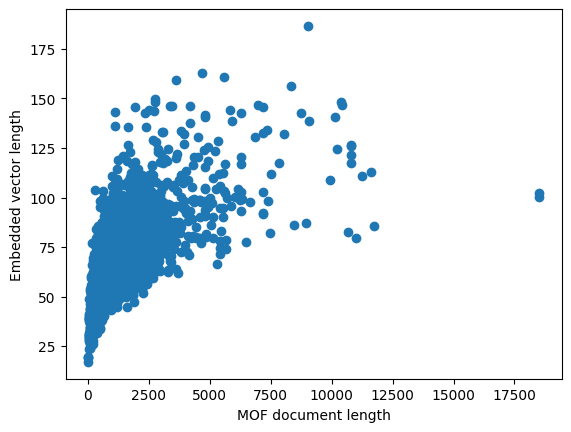

In [14]:
plt.scatter(word_length_ordered, vector_length)
plt.xlabel("MOF document length")
plt.ylabel("Embedded vector length")

In [30]:
np.corrcoef(word_length_ordered, vector_length)

array([[1.       , 0.6669279],
       [0.6669279, 1.       ]])